In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [2]:
from osu_util import read_osu_log, read_osu_log_multi, plot_osu
from collective_algo import allreduce_algo_intelmpi, allreduce_algo_openmpi3, allreduce_algo_openmpi4

In [3]:
ls osu_log/allreduce/N8n288/run1/openmpi3/

allreduce_algo0.log    allreduce_algo3.log    allreduce_default.log
allreduce_algo1.log    allreduce_algo4.log
allreduce_algo2.log    allreduce_algo5.log


In [4]:
TOP_DIR = 'osu_log/allreduce/N8n288/run3/'

In [5]:
def plot_barh(df):
    fig, axes = plt.subplots(2, 2, figsize=[12, 6])

    for ax, message in zip(axes.flatten(), [1024, 8192, 65536, 1048576]):
        df.loc[message].plot.barh(grid=True, ax=ax)
        ax.set_xlim(0, df.loc[message]['default'] * 5)
        ax.set_title('message size = {}'.format(message))
        ax.set_xlabel('time (us)')
        
        ax.vlines(df.loc[message]['default'], -0.5, df.shape[1], linestyle='--')

    fig.tight_layout()


## OpenMPI3

In [6]:
ompi3_dir = TOP_DIR + 'openmpi3/'

ompi3_file_list = [ompi3_dir + 'allreduce_default.log'] + [ompi3_dir + 'allreduce_algo{}.log'.format(i) for i in range(0, 6)]
ompi3_file_list

['osu_log/allreduce/N8n288/run3/openmpi3/allreduce_default.log',
 'osu_log/allreduce/N8n288/run3/openmpi3/allreduce_algo0.log',
 'osu_log/allreduce/N8n288/run3/openmpi3/allreduce_algo1.log',
 'osu_log/allreduce/N8n288/run3/openmpi3/allreduce_algo2.log',
 'osu_log/allreduce/N8n288/run3/openmpi3/allreduce_algo3.log',
 'osu_log/allreduce/N8n288/run3/openmpi3/allreduce_algo4.log',
 'osu_log/allreduce/N8n288/run3/openmpi3/allreduce_algo5.log']

In [7]:
df_ompi3 = read_osu_log_multi(ompi3_file_list, ['default'] + allreduce_algo_openmpi3)
df_ompi3[::4]

,default,0. ignore,1. basic linear,2. nonoverlapping,3. recursive doubling,4. ring,5. segmented ring
size,,,,,,,
4,273.10,270.65,270.78,465.50,273.99,272.24,284.17
64,280.23,293.00,280.27,278.92,282.85,278.09,280.51
1024,491.01,495.83,292.85,296.98,708.75,665.91,293.73
16384,3969.31,3438.24,3276.54,3252.85,3272.15,3333.68,4122.99
262144,5313.32,5868.86,5237.17,5655.90,5245.47,6282.34,7111.16


(0, 8000)

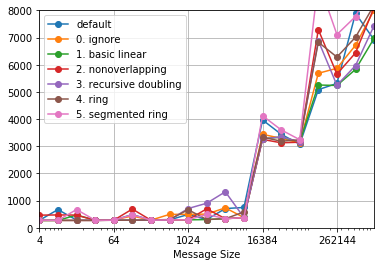

In [8]:
plot_osu(df_ompi3)
plt.ylim(0, 8000)

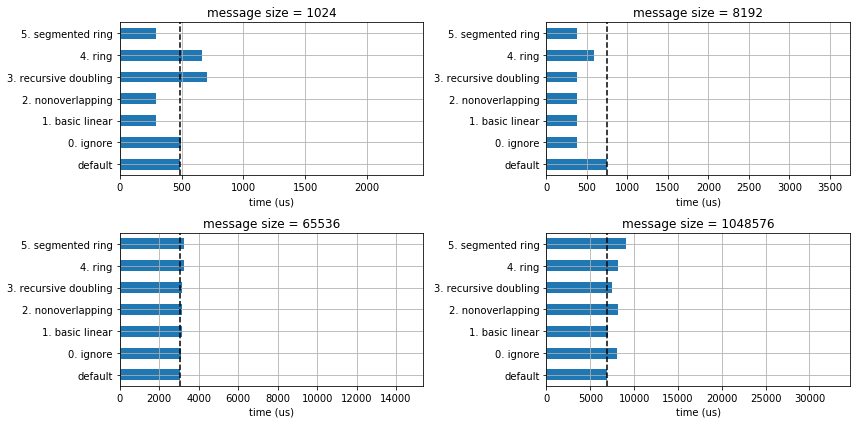

In [9]:
plot_barh(df_ompi3)

# OpenMPI4

In [10]:
ompi4_dir = TOP_DIR + 'openmpi4/'

ompi4_file_list = [ompi4_dir + 'allreduce_default.log'] + [ompi4_dir + 'allreduce_algo{}.log'.format(i) for i in range(0, 6)]
ompi4_file_list

['osu_log/allreduce/N8n288/run3/openmpi4/allreduce_default.log',
 'osu_log/allreduce/N8n288/run3/openmpi4/allreduce_algo0.log',
 'osu_log/allreduce/N8n288/run3/openmpi4/allreduce_algo1.log',
 'osu_log/allreduce/N8n288/run3/openmpi4/allreduce_algo2.log',
 'osu_log/allreduce/N8n288/run3/openmpi4/allreduce_algo3.log',
 'osu_log/allreduce/N8n288/run3/openmpi4/allreduce_algo4.log',
 'osu_log/allreduce/N8n288/run3/openmpi4/allreduce_algo5.log']

In [11]:
df_ompi4 = read_osu_log_multi(ompi4_file_list, ['default'] + allreduce_algo_openmpi4)
df_ompi4[::4]

,default,0. ignore,1. basic linear,2. nonoverlapping,3. recursive doubling,4. ring,5. segmented ring
size,,,,,,,
4,270.56,276.29,1246.50,256.72,448.27,269.52,269.52
64,280.98,280.00,1148.19,277.70,284.21,472.13,280.99
1024,293.07,305.19,1340.49,279.21,292.78,290.16,308.74
16384,2947.21,2813.91,5005.82,856.72,542.51,2786.09,2762.43
262144,4813.91,4613.40,100269.29,7658.89,5462.35,6435.03,5081.56


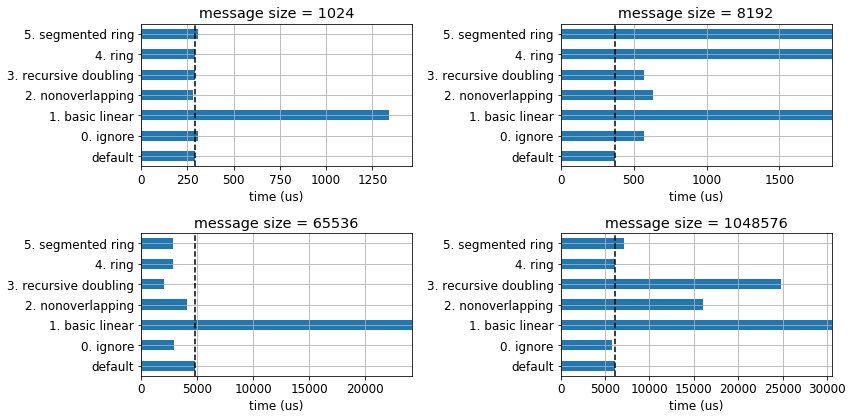

In [12]:
plt.rcParams['font.size'] = 12
plot_barh(df_ompi4)

## MPICH

In [13]:
mpich_dir = TOP_DIR + 'mpich3/'

In [14]:
df_mpich = read_osu_log_multi([mpich_dir + 'allreduce_default.log'], columns=['default'])
df_mpich[::4]

,default
size,
4,107.30
64,117.96
1024,132.65
16384,259.85
262144,2269.45


## Intel MPI

In [15]:
impi_dir = TOP_DIR + '/intelmpi-tcp/'

impi_file_list = [impi_dir + 'allreduce_default.log'] + [impi_dir + 'allreduce_algo{}.log'.format(i) for i in range(1, 13)]
df_impi = read_osu_log_multi(impi_file_list, ['default'] + allreduce_algo_intelmpi)
df_impi[::4]

,default,1. Recursive doubling,2. Rabenseifner's,3. Reduce + Bcast,4. Topology aware Reduce + Bcast,5. Binomial gather + scatter,6. Topology aware binominal gather + scatter,7. Shumilin's ring,8. Ring,9. Knomial,10. Topology aware SHM-based flat,11. Topology aware SHM-based Knomial,12. Topology aware SHM-based Knary
size,,,,,,,,,,,,,
4,100.36,272.45,271.82,216.33,97.75,215.18,159.26,569.32,2527.27,271.12,94.51,96.17,99.94
64,94.68,380.46,277.09,120.44,94.40,218.22,162.35,589.26,2545.17,276.58,89.77,88.18,94.51
1024,208.03,798.41,648.41,223.50,205.58,533.25,387.21,907.62,2654.64,746.08,207.06,201.25,204.05
16384,591.93,846.98,1231.56,457.20,493.87,573.06,418.64,1562.00,2910.68,826.97,507.08,486.01,490.09
262144,1217.97,4917.70,1590.17,2997.56,1213.27,2437.73,1944.76,10205.18,36435.60,5005.00,5183.37,6717.16,4868.59


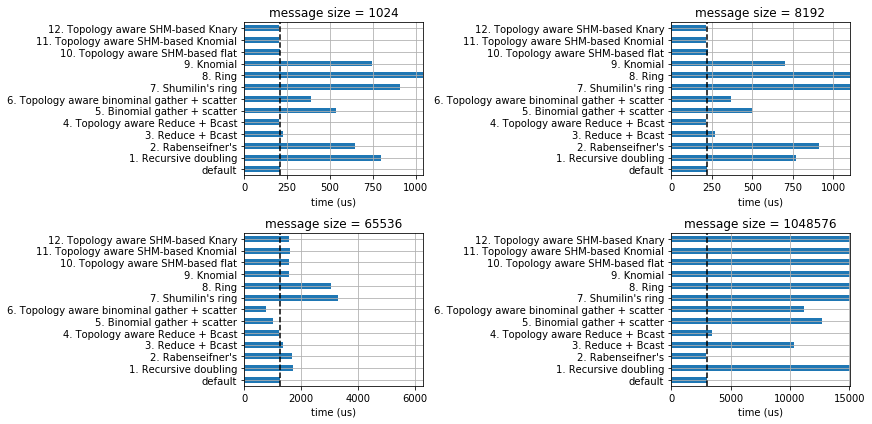

In [16]:
plt.rcParams['font.size'] = 10

plot_barh(df_impi)

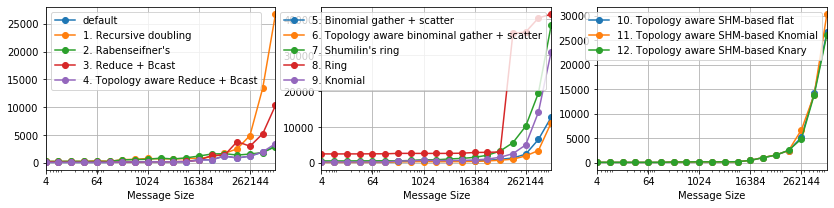

In [17]:
fig, axes = plt.subplots(1, 3, figsize=[14, 3])

plot_osu(df_impi.iloc[:, 0:5], ax=axes[0])
plot_osu(df_impi.iloc[:, 5:10], ax=axes[1])
plot_osu(df_impi.iloc[:, 10:], ax=axes[2])

## Intel MPI EFA

In [18]:
impi_efa_dir = TOP_DIR + '/intelmpi-efa/'

impi_efa_file_list = [impi_efa_dir + 'allreduce_default.log'] + [impi_efa_dir + 'allreduce_algo{}.log'.format(i) for i in range(1, 13)]

df_impi_efa = read_osu_log_multi(impi_efa_file_list, ['default'] + allreduce_algo_intelmpi)
df_impi_efa[::4]

,default,1. Recursive doubling,2. Rabenseifner's,3. Reduce + Bcast,4. Topology aware Reduce + Bcast,5. Binomial gather + scatter,6. Topology aware binominal gather + scatter,7. Shumilin's ring,8. Ring,9. Knomial,10. Topology aware SHM-based flat,11. Topology aware SHM-based Knomial,12. Topology aware SHM-based Knary
size,,,,,,,,,,,,,
4,93.73,318.87,193.25,87.33,76.41,187.76,163.89,318.01,1667.43,192.49,135.24,108.17,126.90
64,65.31,318.77,194.34,56.78,66.06,186.65,131.47,325.87,1618.15,192.01,65.43,65.43,65.70
1024,68.21,334.70,424.92,78.22,69.13,194.75,140.30,490.06,1607.96,200.60,70.38,68.80,69.02
16384,218.55,597.15,403.17,172.71,212.19,630.86,419.51,992.12,16577.79,596.89,232.93,213.76,214.57
262144,898.90,4171.69,720.79,2489.23,909.34,1997.37,1434.59,4736.54,17089.06,4148.60,4145.90,4150.37,4152.98


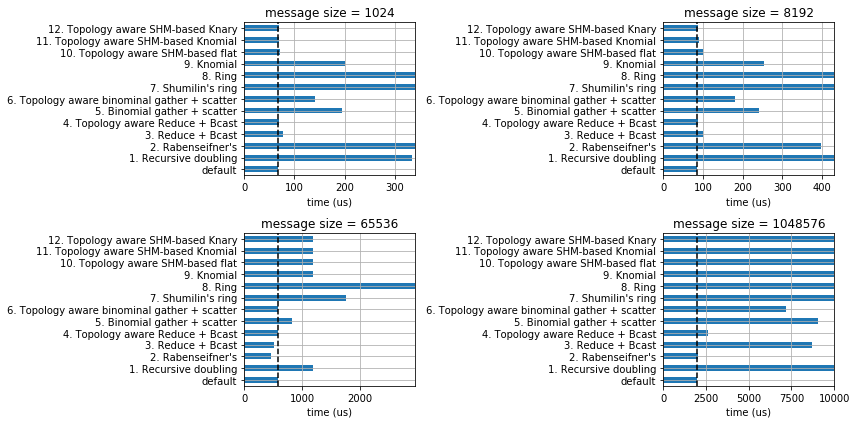

In [19]:
plot_barh(df_impi_efa)

# Put all together

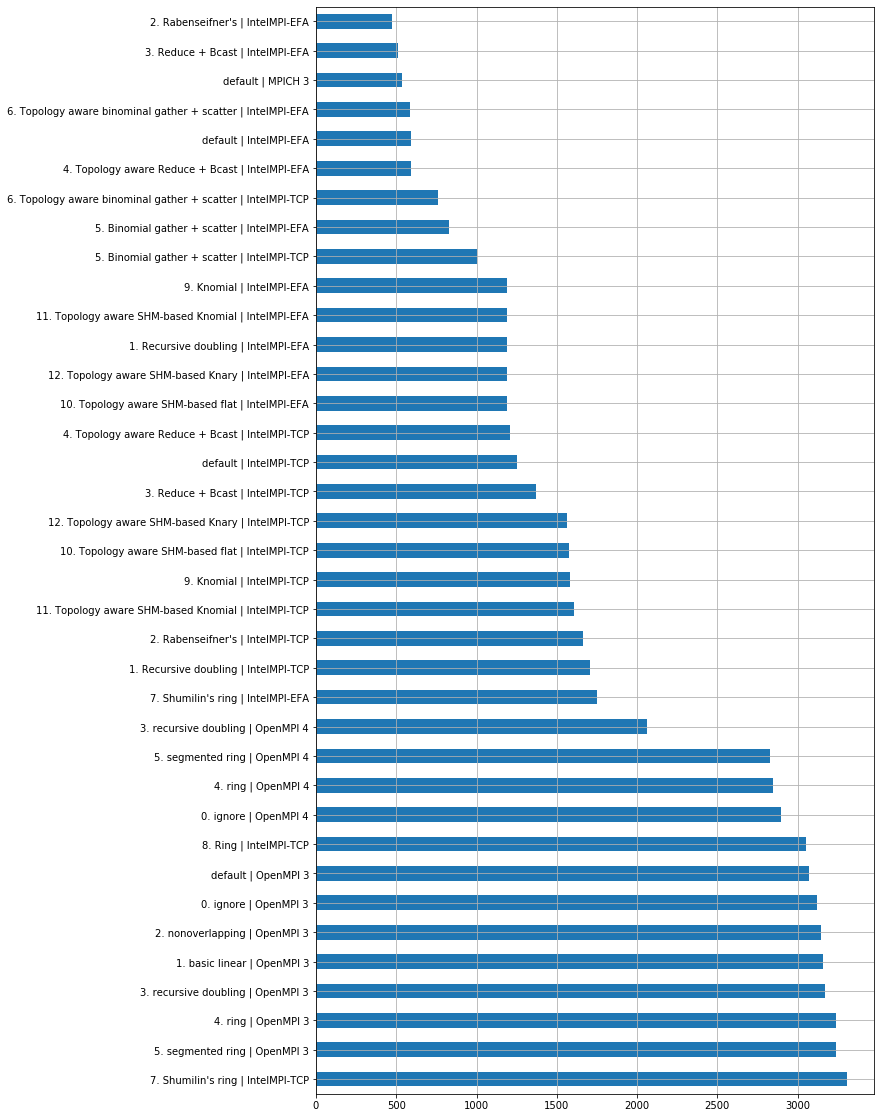

In [20]:
df_all = pd.concat(
    [df_ompi3.add_suffix(' | OpenMPI 3'), 
     df_ompi4.add_suffix(' | OpenMPI 4'), 
     df_mpich.add_suffix(' | MPICH 3'), 
     df_impi.add_suffix(' | IntelMPI-TCP'),
     df_impi_efa.add_suffix(' | IntelMPI-EFA')
    ], axis=1)

df_select = df_all.loc[65536]
df_select = df_select[df_select < df_select['default | OpenMPI 3']*1.2] # ignore cases that are too slower than default
df_select.sort_values(ascending=False).plot.barh(figsize=[10, 20], grid=True)

## Only select default cases

In [21]:
df_default = df_all.filter(like='default', axis=1)

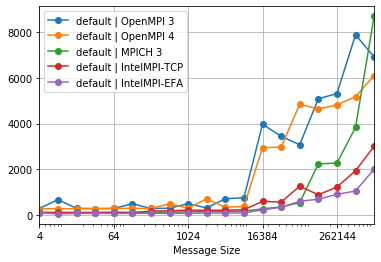

In [22]:
plot_osu(df_default)

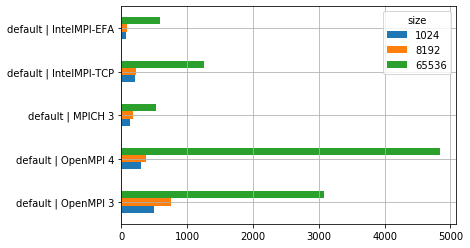

In [23]:
df_default.loc[[1024, 8192, 65536]].T.plot.barh(grid=True)

## Only select important cases

In [24]:
df_important = df_all.filter(regex=r'(default|recursive doubling)')
df_important.index.name='message size (Bytes)'

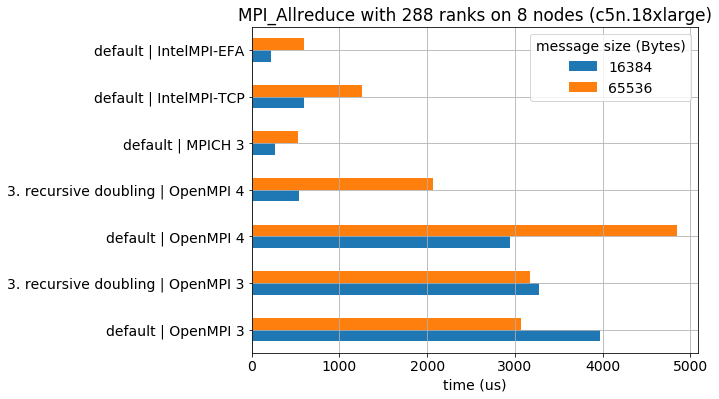

In [25]:
plt.rcParams['font.size'] = 14

df_important.loc[[16384, 65536]].T.plot.barh(grid=True, figsize=[8, 6])
plt.xlabel('time (us)')
plt.title('MPI_Allreduce with 288 ranks on 8 nodes (c5n.18xlarge)')
plt.savefig('allreduce_summary.png', dpi=144, bbox_inches='tight')

Text(0.5, 0, 'time (us)')

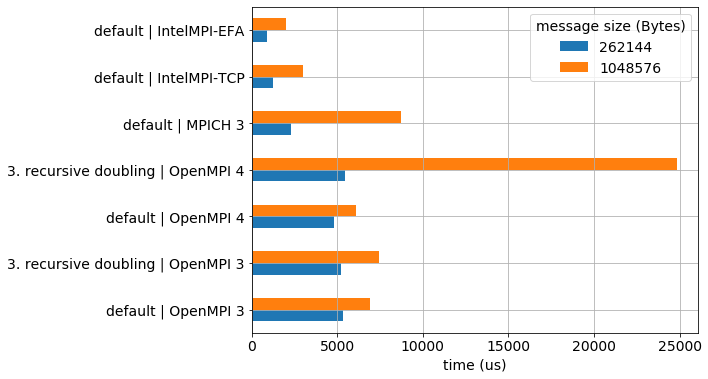

In [26]:
df_important.loc[[262144, 1048576]].T.plot.barh(grid=True, figsize=[8, 6])
plt.xlabel('time (us)')